# Landsat Linear Feature Visualization Using through Image Processing and Coordinate System Conversion

## Objective

#### - Identify and trace fracture sets in landsat imagery
#### - Obtain numerical orientation, density, and magnitude data from images 
#### - Reduce error and plot statistical data

## Library Import

In [3]:
import numpy as np #array library
import matplotlib.pyplot as plt #plots
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift
%matplotlib inline
!pip install opencv-python
import cv2
import pylab as pl
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
import math
from skimage.transform import probabilistic_hough_line
from matplotlib import cm #colormap, image color transform
from skimage.morphology import skeletonize
from skimage import morphology, filters
%cd "C:\Users\alexa\OneDrive\Documents\GEOPython_Course"

C:\Users\alexa\OneDrive\Documents\GEOPython_Course


## Study Area

### Blaine Escarpment - Geographic feature of topographic relief running from southern Oklahoma to southern Kansas
-----------------------------------------------------------------------------------------------------------------------

<function matplotlib.pyplot.show(*args, **kw)>

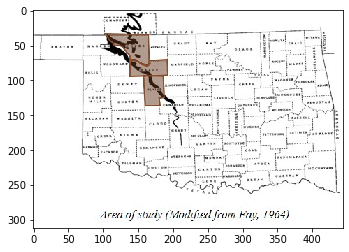

In [4]:
pica=cv2.imread('pica.jpg')
plt.imshow(pica)
plt.show

### Consists of caprock gypsum overlying weatherable subcaprock shale. Results in concentric, edge-parallel fracture patterns on gypsum surface rock

-----------------------------------------------------------------------------------------------------------------------

<function matplotlib.pyplot.show(*args, **kw)>

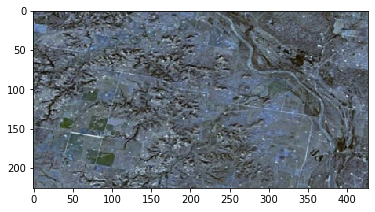

In [5]:
picb=cv2.imread('picb.jpg')
plt.imshow(picb)
plt.show

### Sample Region

<function matplotlib.pyplot.show(*args, **kw)>

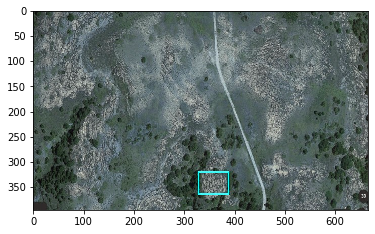

In [6]:
picc=cv2.imread('picc.jpg')
plt.imshow(picc)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

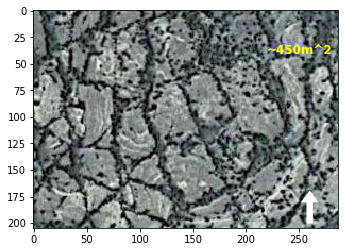

In [7]:
img1=cv2.imread('fr2.jpg')
plt.imshow(img1)
plt.text(220, 40, '~450m^2', fontsize=12, color='yellow', weight='bold')
plt.arrow(260, 200, 0, -30, length_includes_head=True, width=5,
          head_width=15, head_length=10, color='white')
plt.show

## Hough Transform Using Skimage and OpenCV

#### Using Skimage and OpenCV, a hough transform is utilized to identify straight linear features in image. This consists of individual pixels in XY space having their positions with the line equation (y=mx+c) rearranged so that they are placed within the slope and y-intercept positions (c=-xm+y, called mc or parameter space). This creates a line in mc space. All of the pixels that that fall along a line in XY space form individual lines in mc space that have a common point at which they intersect. This common point gives a point with mc coordinates in mc space, which formulates a line in XY space. The pixels accumulate within an accumulator variable in the hough transform function and depending upon the threshold input from the user, define how many pixels may fall in line before it is defined as a line. 
-----------------------------------------------------------------------------------------------------------------------

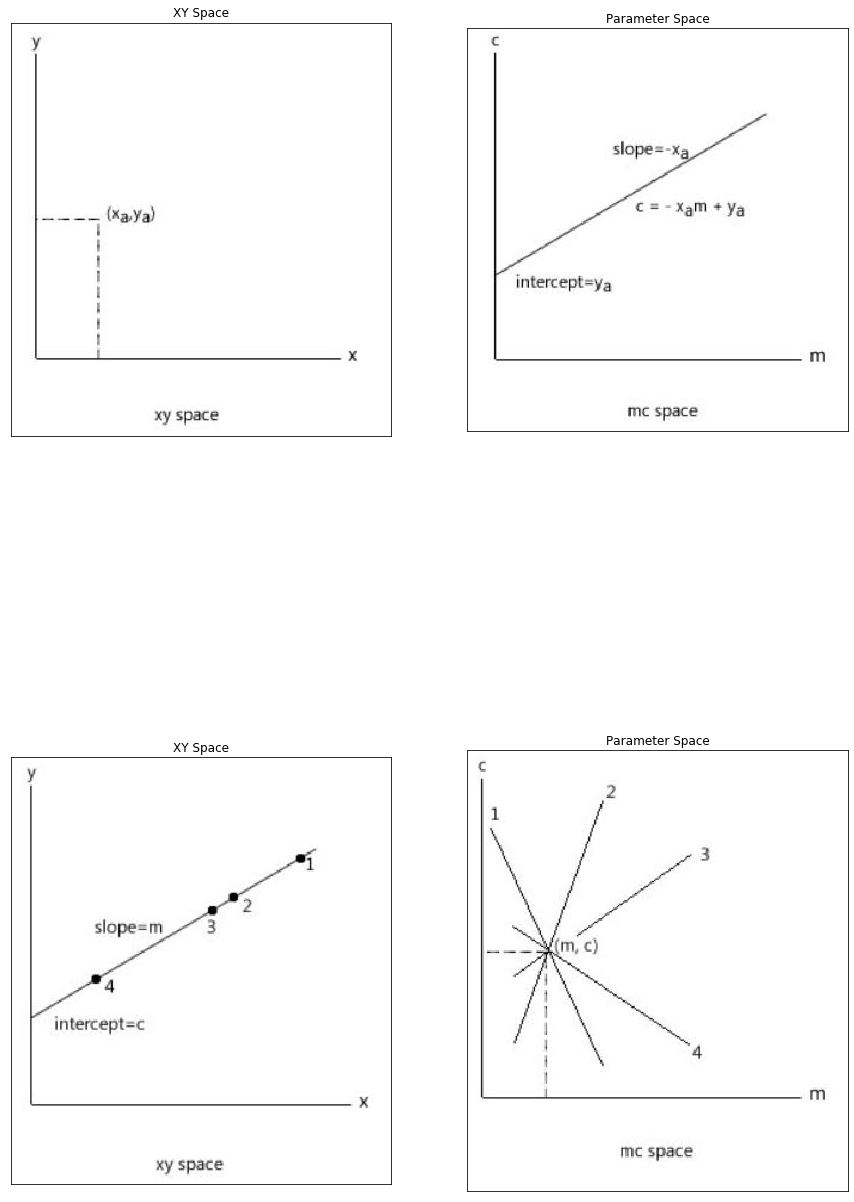

In [8]:
imga = cv2.imread('ht1.jpg',0)
imgb = cv2.imread('ht2.jpg',0)
imgc = cv2.imread('ht3.jpg',0)
imgd = cv2.imread('ht4.jpg',0)
imge = cv2.imread('ht5.jpg',0)
title = ['XY Space','Parameter Space','XY Space', 'Parameter Space', 'Polar Coordinates']
ima = [imga, imgb, imgc, imgd, imge]
fig, x = plt.subplots(1, 4, figsize=(15, 25))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(ima[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### These lines are defined in polar coordinates, using an imaginary line from the origin to where the imaginary line intersects the actual graphed line at a 90 degree angle. The length of this imaginary line is termed rho and the angle of the imaginary line from the x-axis is termed theta.
-----------------------------------------------------------------------------------------------------------------------

<function matplotlib.pyplot.show(*args, **kw)>

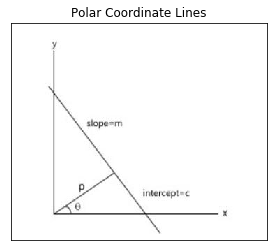

In [9]:
pic=cv2.imread('ht5.jpg')
plt.imshow(pic)
plt.title('Polar Coordinate Lines')
plt.xticks([]),plt.yticks([])
plt.show

#### The hough transform function in skimage often uses an edge detection method, which is displayed below using OpenCV. After the edge detection, the hough transform runs on the binary white pixels created from the edge detection. 
-----------------------------------------------------------------------------------------------------------------------

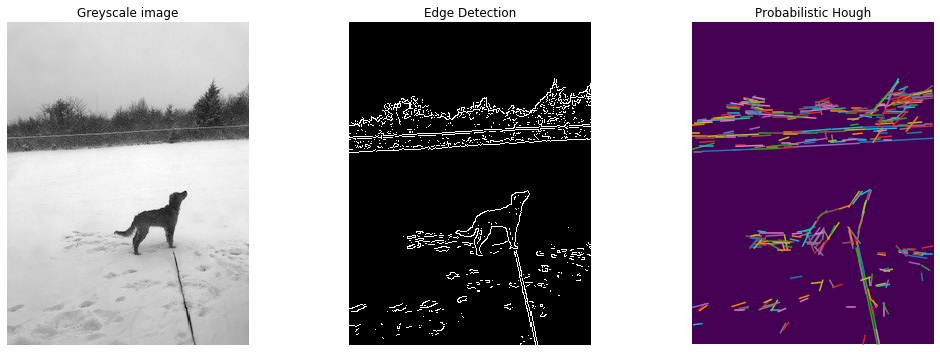

In [10]:
img = cv2.imread('dog.jpg',0)
image=img
edges = cv2.Canny(image, 80, 85, 50)# edge detection with opencv (image, threshold values for edge definition)
lines = probabilistic_hough_line(edges, threshold=10, line_length=7,line_gap=5)# using the edge detection image, threshold = minimum line bin accumulations
                                            # necessary to display line segment, line_length=minimum line length for line to be displayed
                                            # line_gap=least amount of gap between lines to connect line segments

fig, x = plt.subplots(1, 3, figsize=(15, 5))#rows, columns, size of plot and subplots
xr = x.ravel()# returns a flattened array {1:3}
xr[0].imshow(image, cmap=cm.gray)# opencv showing image with grayscale colormap transform
xr[0].set_title('Greyscale image')
xr[1].imshow(edges, cmap=cm.gray)# opencv showing image with grayscale colormap transform
xr[1].set_title('Edge Detection')
xr[2].imshow(edges * 0)# returning same image as edges with no edge lines
for line in lines:
    rho, theta = line #rho and theta are equal to line in polar coordinates
    xr[2].plot((rho[0], theta[0]), (rho[1], theta[1]))#plot line endpoints
xr[2].set_xlim((0, image.shape[1]))
xr[2].set_ylim((image.shape[0], 0))
xr[2].set_title('Probabilistic Hough')
for a in xr: 
    a.set_axis_off()#remove axis from subplots
plt.tight_layout()
plt.show()

## Initial Measurement

#### Using an image with fractures that have a definable width, the edge method does not work as it detects channel type feature when following the edges. This results in chaotic hough transform lines.
-----------------------------------------------------------------------------------------------------------------------

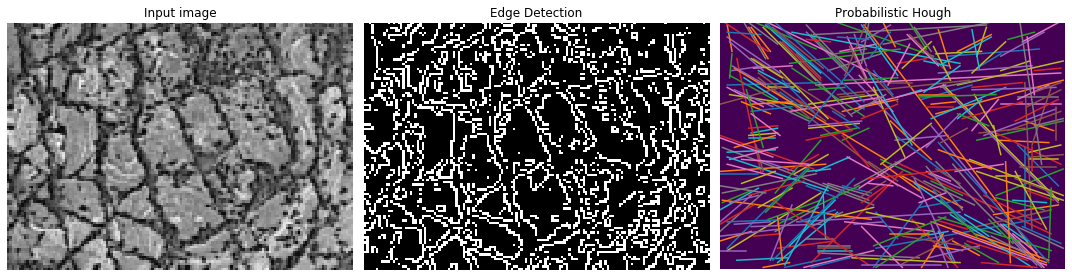

In [11]:
img = cv2.imread('fr2.jpg',50)
image=img
edges = cv2.Canny(image, 350, 350, 1000)# 
lines = probabilistic_hough_line(edges, threshold=15, line_length=10, 
                                 line_gap=7)
fig, x = plt.subplots(1, 3, figsize=(15, 5))
xr = x.ravel()
xr[0].imshow(image, cmap=cm.gray)
xr[0].set_title('Input image')
xr[1].imshow(edges, cmap=cm.gray)
xr[1].set_title('Edge Detection')
xr[2].imshow(edges * 0)
for line in lines:
    rho, theta = line 
    xr[2].plot((rho[0], theta[0]), (rho[1], theta[1]))
xr[2].set_xlim((0, image.shape[1]))
xr[2].set_ylim((image.shape[0], 0))
xr[2].set_title('Probabilistic Hough')
for a in xr: 
    a.set_axis_off()
plt.tight_layout()
plt.show()

## Processing

#### To fix the problem of the last image, the image needs to be futher processed so that the thick fractures are reduced to lines of minimal width, this is done by taking the skeletal image of the original. First the original is inverted, so that the pixel values are inversed. Then, setting a threshold value, pixels below that value are set to black and pixels ablove are set to white, creating our binary image.
-----------------------------------------------------------------------------------------------------------------------

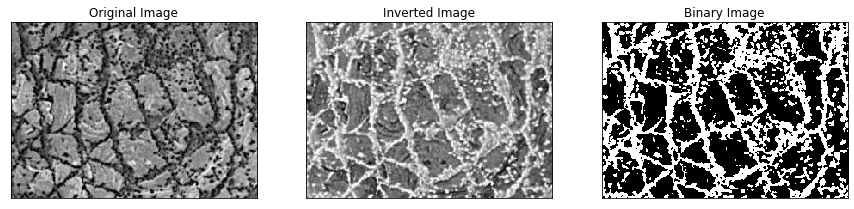

In [12]:
img0 = cv2.imread('fr2.jpg',0) #reads image as greyscale
img = cv2.bitwise_not(img0)# reverses colorscale
ret,th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)# greyscale image called and pixels given specific values, min and max threshold values
                                                    # values less than 150 given value of 0. values over 150 given value of 155
                                                    # creates binary image of white(255) and black(0) pixels
titles = ['Original Image', 'Inverted Image','Binary Image']
images = [img0, img, th1]
fig, x = plt.subplots(1, 3, figsize=(15, 15))#calling three subplot images
for i in range(3):
    plt.subplot(3,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Our previous binary image was too messy, so the original is ran through some blurring filters before inversion, to reduce noise within the image. This creates a much clearer binary image.
-----------------------------------------------------------------------------------------------------------------------

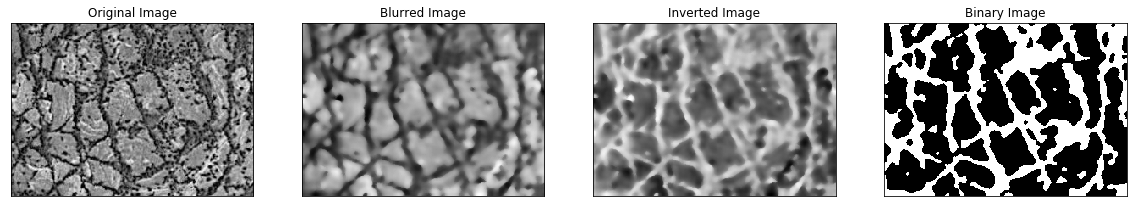

In [13]:
img0 = cv2.imread('fr2.jpg',0) #reads image as greyscale
img1 = cv2.medianBlur(img0,5)#image blurring
img1 = cv2.bilateralFilter(img1,10,75,75)#further gaussian image blur
img = cv2.bitwise_not(img1)# reverses colorscale
fig, x = plt.subplots(1, 4, figsize=(20, 30))# plot range and size
ret,th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
titles = ['Original Image','Blurred Image','Inverted Image', 'Binary Image']
images = [img0, img1, img, th1]
for i in range(4):
    plt.subplot(3,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### To clean up the image further and make the skeletal image easier to interpret, the image is eroded to dilate the fractal features a bit more. The skeleton can then be extracted. 
-----------------------------------------------------------------------------------------------------------------------

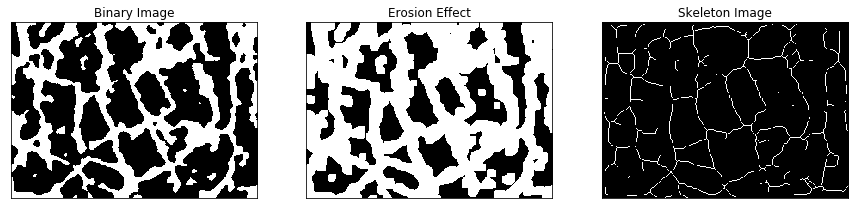

In [14]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.dilate(th1,kernel,iterations = 5)
binary = erosion > filters.threshold_otsu(erosion)
np.unique(binary)
np.array([False,  True])
skeleton = morphology.skeletonize(binary) 
images = [th1,erosion,skeleton]
im=['Binary Image','Erosion Effect', 'Skeleton Image']
fig, x = plt.subplots(1, 3, figsize=(15, 20))

for i in range(3):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(im[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Cleaned Imaged

#### Using this process, our image is much cleaner and our hough lines are representative of the original fracture patterns.
-----------------------------------------------------------------------------------------------------------------------

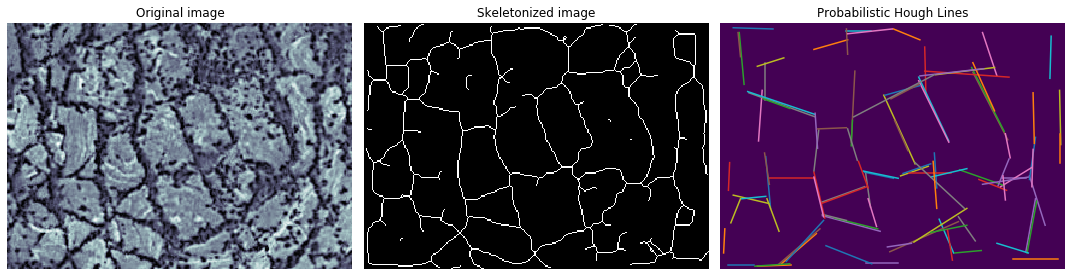

In [15]:
image=skeleton
lines = probabilistic_hough_line(image, threshold=25, line_length=20,
                                 line_gap=15)
fig, x = plt.subplots(1, 3, figsize=(15, 10), sharex=True, sharey=True)
xr = x.ravel()
xr[0].imshow(img0, cmap=cm.bone)
xr[0].set_title('Original image')
xr[1].imshow(image, cmap=cm.gray)
xr[1].set_title('Skeletonized image')
xr[2].imshow(image * 0)
for line in lines:
    rho, theta = line
    xr[2].plot((rho[0], theta[0]), (rho[1], theta[1]))
xr[2].set_xlim((0, image.shape[1]))
xr[2].set_ylim((image.shape[0], 0))
xr[2].set_title('Probabilistic Hough Lines')
for a in xr:
    a.set_axis_off()
plt.tight_layout()
plt.show()

#### Now that we have our stright lines, we can define their orientation by extracting their elements. So since the hough function defines lines by their polar coordinates, we extract the rho and theta elements. 
-----------------------------------------------------------------------------------------------------------------------

In [16]:
lin=[]
for line in lines:
    rho, theta = line
    lin.append(rho)
    lin.append(theta)
df = pd.DataFrame(lin, columns=['rho', 'theta'])
df.head()

,rho,theta
0,7,201
1,28,201
2,243,196
3,281,196
4,20,51


#### Now to seperate the rho and theta values so that we may convert them to the cartesian system and extract the slope and intercept values. 
-----------------------------------------------------------------------------------------------------------------------

In [17]:
lst=[]
for a, b in enumerate(lin):
    for rho, theta in enumerate(b):
        x=rho
        c=theta
        lst.append(c)
rhos=lst[::2]
thetas=lst[1::2]

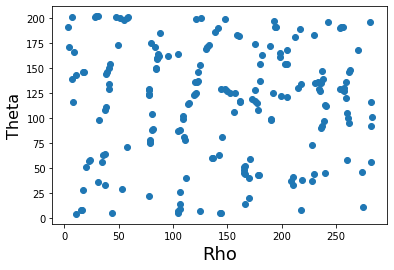

In [18]:
plt.scatter(rhos, thetas)
plt.xlabel('Rho', fontsize=18)
plt.ylabel('Theta', fontsize=16)
plt.show() 

#### In order to find the slope value from a polar theta value, we need to solve with $m=\frac{-1}{tan(\theta)}$ and for the y-intercept we use $b=\rho*\frac{1}{sin(\theta)}$. If we know these values we can plot them in cartesian space and determine their strike orientation based up a north oriented image.
-----------------------------------------------------------------------------------------------------------------------

In [19]:
m=[]
b=[]
d=[]
for thet in thetas:
    f=-1/math.tan(thet)
    m.append(f)
for rh, thets in zip(rhos, thetas):
    r=rh*1/math.sin(thets)
    b.append(r)

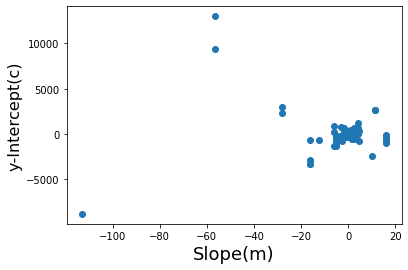

In [20]:
del m[38]
del b[38]
del m[117]
del b[117]
df1 = pd.DataFrame(m, columns=['m'])
df2 = pd.DataFrame(b, columns=['b'])
plt.scatter(m, b)
plt.xlabel('Slope(m)', fontsize=18)
plt.ylabel('y-Intercept(c)', fontsize=16)
plt.show() 

#### Now, to complicate matters further, each of those points represent a line ine the hough space image. However, a singular fracture from the original image is represented in hough space by a random and variable number of lines. So while there are maybe 15 fractures in the original, there are about a hundred lines. How can we determine a representative orientation of these fractures with so many nonrepresentative lines. In order to address this problem I decided to uses a k-means clustering algorithm. A single fracture may have many lines in hough space, however, they should share similar slope and intercept values, at least more similar than other fracture lines. Therefore they should plot next to each other when we plot the slope and y-intercept value on the graph above. These clustered points should be able to be defined using a k-means algorithm. So, we should theoretically be able to plot singular cluster centroids that will be representative of a single fracture in the original image. First we eliminate the far outliers, then we run the k-menas algorithm, and finally we plot the infinite lines created from the centroids, which should be representative of the original fracture lines, only of infinite length. Since we are interested in the orientation, this isn't a problem.
-----------------------------------------------------------------------------------------------------------------------

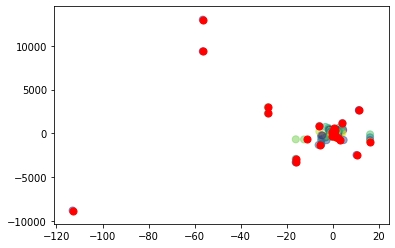

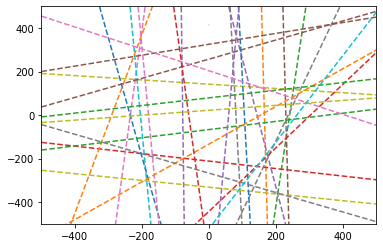

In [63]:
import pylab as pl
from sklearn.decomposition import PCA
df = pd.DataFrame(zip(m, b),columns=['m','b'])
df=df[(np.abs(stats.zscore(df)) < 500).all(axis=1)]
kmeans = KMeans(n_clusters=30).fit(df)
centroids = kmeans.cluster_centers_
plt.scatter(df['m'], df['b'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()
cen=centroids.tolist()
pi=math.pi
slope,yint = map(list,zip(*cen))

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
for sl, intg in zip(slope, yint):
    abline(sl,intg)
    plt.ylim(-500, 500)
    plt.xlim(-500, 500)
    plt.plot()


#### Now we can convert slope and intercept into strike orientation. This is done by taking finding the tangent of the slope (x). Next we input that into the equation $x(\frac{180}{\pi})$. Now we have an angle from the x-axis to use in our plot.
-----------------------------------------------------------------------------------------------------------------------

In [62]:
strikes=[]
for slp in m:
    x=math.atan(slp)
    y=((180/math.pi)*x)
    strikes.append(y)

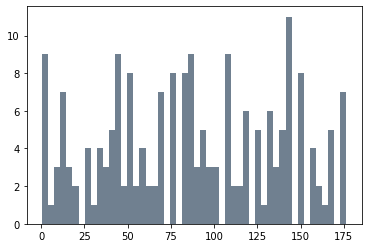

In [23]:
plt.hist(strikes, bins = 50, color='slategrey')
plt.show()

#### Using all of these procedures, we can put everything together to build a function with minimal parameters. So now, with an appropriate north oriented picture and appropriate input parameters of the hough threshold, length, line gap and k-means cluster number, we can obtain a representative rose plot of an image with fractures and lineations. 
-----------------------------------------------------------------------------------------------------------------------

In [66]:
def orient_pic(image, hough_threshold, hough_line_length, hough_line_gap, kmeans_cluster):
    im0 = cv2.imread(image,0)
    img1 = cv2.medianBlur(im0,5)
    img1 = cv2.bilateralFilter(img1,10,75,75)
    img = cv2.bitwise_not(img1)
    ret,th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
    kernel = np.ones((2,2),np.uint8)
    erosion = cv2.dilate(th1,kernel,iterations = 5)
    binary = erosion > filters.threshold_otsu(erosion)
    np.unique(binary)
    np.array([False,  True])
    skeleton = morphology.skeletonize(binary) 
    image=skeleton
    lines = probabilistic_hough_line(image, threshold=hough_threshold, line_length=hough_line_length,
                                 line_gap=hough_line_gap)
    for line in lines:
        rho, theta = line
    lin=[]
    for line in lines:
        rho, theta = line
        lin.append(rho)
        lin.append(theta)
    lst=[]
    for a, b in enumerate(lin):
        for rho, theta in enumerate(b):
            x=rho
            c=theta
            lst.append(c)
    rhos=lst[::2]
    thetas=lst[1::2]
    m=[]
    b=[]
    for thet in thetas:
        f=-1/math.tan(thet)
        m.append(f)
    for rh, thets in zip(rhos, thetas):
        r=rh*1/math.sin(thets)
        b.append(r)
    df = pd.DataFrame(zip(m, b),columns=['m','b'])
    df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    kmeans = KMeans(n_clusters=kmeans_cluster).fit(df)
    centroids = kmeans.cluster_centers_
    cen=centroids.tolist()
    pi=math.pi
    slope,yint = map(list,zip(*cen))
    strikes=[]
    strike=[]
    for slp in slope:
        x=math.atan(slp)
        y=((180/math.pi)*x)
        strikes.append(y)
    for x in strikes:
        if (x < 0):
            x = x + 360
            strike.append(x)
        else:
            strike.append(x)
    bin_edges = np.arange(-5, 366, 10)
    number_of_strikes, bin_edges = np.histogram(strike, bin_edges)
    number_of_strikes[0] += number_of_strikes[-1]
    half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
    two_halves = np.concatenate([half, half])
    fig, x = plt.subplots(1, 3, figsize=(20, 4))
    ax = x.ravel()
    ax[0].imshow(im0, cmap=cm.bone)
    ax[0].set_title('Original image')
    ax[1].imshow(skeleton * 0)
    for line in lines:
        rh, th = line
        ax[1].plot((rh[0], th[0]), (rh[1], th[1]))
    ax[1].set_xlim((0, skeleton.shape[1]))
    ax[1].set_ylim((skeleton.shape[0], 0))
    ax[1].set_title('Probabilistic Hough Lines')
    ax[2].remove()
    ax[2]=fig.add_subplot(1,2,2,projection='polar')
    ax[2].bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
    ax[2].set_theta_zero_location('E')
    ax[2].set_theta_direction(-1)
    ax[2].set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
    ax[2].set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
    ax[2].set_title('Rose Diagram', y=1.10, fontsize=15)
   

    for a in ax:
        a.set_axis_off()
    plt.show()


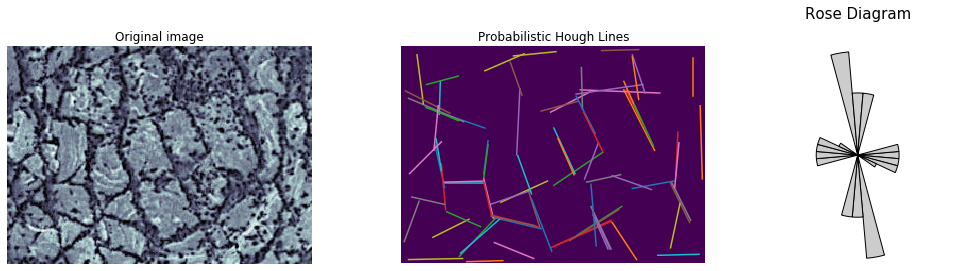

In [78]:
orient_pic('fr2.jpg', 20, 30, 15,20)

#### This code is imperfect, but might be perfected quite easily. Sometimes the orientations are clearly non-representative, but often they are. This problem has been traced to the clustering algorithm. Eventually, I will figure out the best way to cluster my slope/intercept points, but until then this will have to do. Using the various libraries, especially skimage and OpenCV, as well as a rose plot code modified from Bruno Ruas de Pinho's python geoscience blog at http://geologyandpython.com/structural_geology.html. Eventually I would like to modify this to account for many different resolution images at different scale and pick out fracture orientation visualization from seismic timeslice images.
-----------------------------------------------------------------------------------------------------------------------